In [18]:
# Import libraries
import xarray as xr
import rioxarray 
from pathlib import Path
import pandas as pd


In [19]:
# If you want to get min and max lat and long values for a particular country 
def get_bounding_box_max_min_lat_long_values(country_name, df_bounding_boxes):
    # Get min of lat and long for the country
    min_long = df_bounding_boxes[df_bounding_boxes['country'] == country_name]['longmin']
    min_lat = df_bounding_boxes[df_bounding_boxes['country'] == country_name]['latmin']
    # Get max of lat and long for the country
    max_long = df_bounding_boxes[df_bounding_boxes['country'] == country_name]['longmax']
    max_lat = df_bounding_boxes[df_bounding_boxes['country'] == country_name]['latmax']
    return  min_long, min_lat, max_long, max_lat

In [20]:
# Get xarray dataset from source
def get_xarray_dataset(path_to_dataset='hdd1/seasfire/SeasFireCube8daily.zarr'):
    ds = xr.open_zarr(Path.home() / path_to_dataset)
    return ds 

In [21]:
# Decide which country/location you want to plot from the names here 
def get_location_names(path_to_bounding_boxes_dataset='hdd1/akanksha/xarray/country-boundingboxes.csv'):
    df_bounding_boxes = pd.read_csv(Path.home() / path_to_bounding_boxes_dataset)
    country_names_list = df_bounding_boxes['country'].to_list()
    return country_names_list, df_bounding_boxes

In [22]:
# Clip the xarray dataset by getting min and max lat and long and then passing it through the rio built in functions to clip
def get_clipped_xarray_dataset(ds, country_name, df_bounding_boxes):
    # CRS code 
    dsc = ds.rio.write_crs(4326) # Need to specify this as Ilektra mentioned 
    
    # Get min of lat and long for the country  and  max of lat and long for the country
    min_long, min_lat, max_long, max_lat = get_bounding_box_max_min_lat_long_values(country_name, df_bounding_boxes)
    
    # Clip the dataset
    ds_clipped = dsc.rio.clip_box(minx= min_long, miny= min_lat, maxx= max_long,maxy= max_lat)
    
    return ds_clipped 

In [23]:
# Initialise the datacube 
ds = get_xarray_dataset(path_to_dataset='hdd1/seasfire/SeasFireCube8daily.zarr')

# Get the list of countries 
country_names_list, df_bounding_boxes = get_location_names(path_to_bounding_boxes_dataset='hdd1/akanksha/xarray/country-boundingboxes.csv')
country_names_list

['Aruba',
 'Antigua and Barbuda',
 'United Arab Emirates',
 'Afghanistan',
 'Algeria',
 'Azerbaijan',
 'Albania',
 'Armenia',
 'Andorra',
 'Angola',
 'Argentina',
 'Australia',
 'AT',
 'Austria',
 'AV',
 'Bahrain',
 'Barbados',
 'Botswana',
 'BD',
 'Belgium',
 'Bahamas',
 'Bangladesh',
 'Belize',
 'Bosnia and H',
 'Bolivia',
 'Burma',
 'Benin',
 'Belarus',
 'Solomon Isla',
 'Brazil',
 'BS',
 'Bhutan',
 'Bulgaria',
 'BV',
 'Brunei',
 'Burundi',
 'Canada',
 'Cambodia',
 'Chad',
 'Sri Lanka',
 'Republic of ',
 'Democratic R',
 'China',
 'Chile',
 'CJ',
 'CK',
 'Cameroon',
 'Comoros',
 'Colombia',
 'CR',
 'Costa Rica',
 'Central Afri',
 'Cuba',
 'Cape Verde',
 'CW',
 'Cyprus',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Re',
 'Ecuador',
 'Egypt',
 'Ireland',
 'Equatorial G',
 'Estonia',
 'Eritrea',
 'El Salvador',
 'Ethiopia',
 'EU',
 'Czech Republ',
 'FG',
 'Finland',
 'Fiji',
 'FK',
 'Federated St',
 'FO',
 'FP',
 'France',
 'FS',
 'Gambia',
 'Gabon',
 'Georgia',
 'Ghana',
 'GI',
 

In [24]:
# Decide country name 
country_name = 'France'

In [25]:
# Getting all datacube input and output variables for that country 
ds_clipped = get_clipped_xarray_dataset(ds, country_name, df_bounding_boxes)

In [26]:
# See the difference in size 
# ds represents the global dataset 
# ds_clipped represents the particular country 
ds_clipped

<xarray.Dataset>
Dimensions:             (latitude: 40, longitude: 60, time: 966)
Coordinates:
  * latitude            (latitude) float64 51.12 50.88 50.62 ... 41.62 41.38
  * longitude           (longitude) float64 -5.125 -4.875 -4.625 ... 9.375 9.625
  * time                (time) datetime64[ns] 2001-01-01T12:00:00 ... 2021-12...
    spatial_ref         int64 0
Data variables: (12/38)
    BAs_GWIS            (time, latitude, longitude) float32 dask.array<chunksize=(966, 25, 21), meta=np.ndarray>
    BurntArea           (time, latitude, longitude) float32 dask.array<chunksize=(966, 25, 21), meta=np.ndarray>
    FCCI_BA             (time, latitude, longitude) float32 dask.array<chunksize=(966, 25, 21), meta=np.ndarray>
    FCD_emissions       (time, latitude, longitude) float32 dask.array<chunksize=(966, 25, 21), meta=np.ndarray>
    FRP_emissions       (time, latitude, longitude) float32 dask.array<chunksize=(966, 25, 21), meta=np.ndarray>
    LST_Day_CMG         (time, latitude, longitude) float32 dask.array<chunksize=(966, 25, 21), meta=np.ndarray>
    ...                  ...
    t2mmax              (time, latitude, longitude) float32 dask.array<chunksize=(966, 25, 21), meta=np.ndarray>
    t2mmin              (time, latitude, longitude) float32 dask.array<chunksize=(966, 25, 21), meta=np.ndarray>
    tp                  (time, latitude, longitude) float32 dask.array<chunksize=(966, 25, 21), meta=np.ndarray>
    vpd_cf              (time, latitude, longitude) float32 dask.array<chunksize=(966, 25, 21), meta=np.ndarray>
    wp                  (time, latitude, longitude) float32 dask.array<chunksize=(966, 25, 21), meta=np.ndarray>
    ws10                (time, latitude, longitude) float32 dask.array<chunksize=(966, 25, 21), meta=np.ndarray>

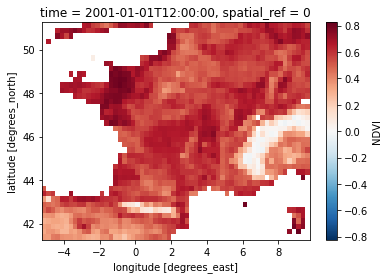

In [87]:
ds_clipped['NDVI'].isel(time=0).plot()

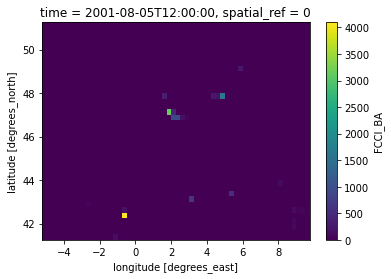

In [91]:
ds_clipped['FCCI_BA'].isel(time=27).plot()

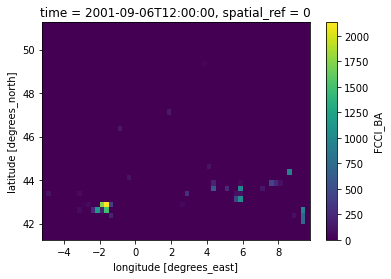

In [94]:
ds_clipped['FCCI_BA'].isel(time=31).plot()

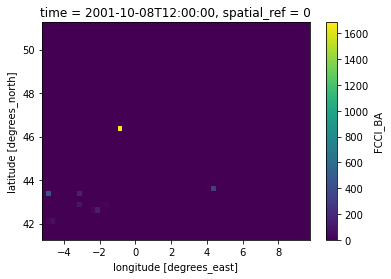

In [98]:
ds_clipped['FCCI_BA'].isel(time=35).plot()

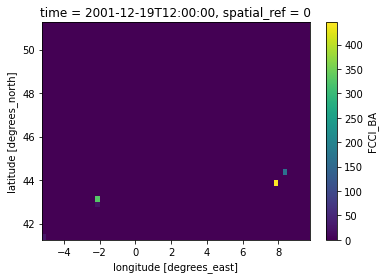

In [102]:
ds_clipped['FCCI_BA'].isel(time=44).plot()

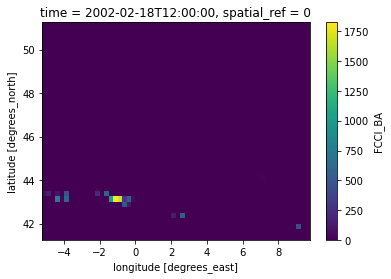

In [104]:
ds_clipped['FCCI_BA'].isel(time=52).plot()